# 🚗 GERMAN USED CAR PRICE PREDICTION

## 📌 Mục tiêu dự án
Xây dựng mô hình Machine Learning để dự đoán giá xe cũ tại thị trường Đức dựa trên các đặc điểm kỹ thuật và thông tin xe.

## 📊 Dataset
- **Nguồn**: German Used Car Dataset
- **Số lượng records ban đầu**: 371,528
- **Số lượng features**: 20
- **Target variable**: `price` (Giá xe bán, đơn vị €)

## 🎯 Quy trình thực hiện
1. **Exploratory Data Analysis (EDA)** - Phân tích khám phá dữ liệu
2. **Data Preprocessing** - Tiền xử lý dữ liệu
3. **Feature Engineering** - Tạo và chọn lọc đặc trưng
4. **Model Training & Evaluation** - Huấn luyện và đánh giá mô hình
5. **Hyperparameter Tuning** - Tối ưu hóa siêu tham số
6. **Final Model Testing** - Kiểm tra mô hình cuối cùng

---

In [2]:
# =============================================================================
# IMPORT LIBRARIES
# =============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Profiling
import ydata_profiling

# Progress bar
from tqdm import tqdm

# Machine Learning - Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Machine Learning - Preprocessing & Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

# Machine Learning - Model Selection & Evaluation
from sklearn.model_selection import (
    train_test_split, 
    cross_validate, 
    KFold,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.metrics import (
    mean_absolute_error, 
    root_mean_squared_error, 
    r2_score, 
    make_scorer
)

# Settings
%matplotlib inline
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---

# 📊 PHẦN 1: EXPLORATORY DATA ANALYSIS (EDA)

## 1.1 Load và Khám phá dữ liệu ban đầu

Trong phần này, chúng ta sẽ:
- Load dataset từ file CSV
- Kiểm tra thông tin cơ bản (shape, dtypes, missing values)
- Tạo báo cáo tổng quan với ydata_profiling

---

In [3]:
# =============================================================================
# 1.1 LOAD DATASET
# =============================================================================

# Đọc dữ liệu từ file CSV
df = pd.read_csv("data/autos.csv")

# Xóa cột 'index' không cần thiết
df.drop(columns="index", axis=1, inplace=True)

# Hiển thị thông tin cơ bản
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n🔍 First 5 rows:")
display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📊 Basic Statistics:")
display(df.describe())

DATASET OVERVIEW
📏 Shape: 371,528 rows × 20 columns
💾 Memory usage: 293.07 MB

🔍 First 5 rows:


dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  \
0     150000                    0   benzin  volkswagen               NaN   
1     125000                    5   diesel        audi                ja   
2     125000                    8   diesel        jeep               NaN   
3     150000                    6   benzin  volkswagen              nein   
4      90000                    7   diesel       skoda              nein   

           dateCreated  nrOfPictures  postalCode             lastSeen  
0  2016-03-24 00:00:00             0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00             0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00             0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00             0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00             0       60437  2016-04-06 10:17:21


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage

price  yearOfRegistration        powerPS      kilometer  \
count  3.715280e+05       371528.000000  371528.000000  371528.000000   
mean   1.729514e+04         2004.577997     115.549477  125618.688228   
std    3.587954e+06           92.866598     192.139578   40112.337051   
min    0.000000e+00         1000.000000       0.000000    5000.000000   
25%    1.150000e+03         1999.000000      70.000000  125000.000000   
50%    2.950000e+03         2003.000000     105.000000  150000.000000   
75%    7.200000e+03         2008.000000     150.000000  150000.000000   
max    2.147484e+09         9999.000000   20000.000000  150000.000000   

       monthOfRegistration  nrOfPictures    postalCode  
count        371528.000000      371528.0  371528.00000  
mean              5.734445           0.0   50820.66764  
std               3.712412           0.0   25799.08247  
min               0.000000           0.0    1067.00000  
25%               3.000000           0.0   30459.00000  
50%               6.000000           0.0   49610.00000  
75%               9.000000           0.0   71546.00000  
max              12.000000           0.0   99998.00000

## 1.2 Tạo báo cáo EDA với ydata_profiling

---

In [4]:
# =============================================================================
# 1.2 COMPREHENSIVE DATA PROFILING
# =============================================================================

# Tạo báo cáo chi tiết với ydata_profiling
# Lưu ý: Quá trình này có thể mất vài phút với dataset lớn

print("🔄 Generating comprehensive data profiling report...")
print("⏳ This may take a few minutes...")

profile = ydata_profiling.ProfileReport(df, title="German Used Car Dataset Profile")
profile.to_notebook_iframe()

🔄 Generating comprehensive data profiling report...
⏳ This may take a few minutes...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

## 1.3 Tổng kết phân tích EDA

### ✅ Phát hiện chính:

#### 📌 **1. Thông tin tổng quan**
- **Số lượng thuộc tính**: 20 features
- **Số lượng records**: 371,528 xe
- **Missing values**: 184,008 cells (2.5%)
- **Duplicates**: 4 rows
- **Dataset size**: 56.7 MB

#### ⚠️ **2. Vấn đề Missing Values**
| Feature | Missing Count | Missing % |
|---------|---------------|-----------|
| `notRepairedDamage` | 72,060 | 19.4% |
| `vehicleType` | 37,869 | 10.2% |
| `fuelType` | 33,386 | 9.0% |
| `model` | 20,484 | 5.5% |
| `gearbox` | 20,209 | 5.4% |

#### 🔢 **3. Vấn đề Zero Values**
| Feature | Zero Count | Zero % |
|---------|------------|--------|
| `powerPS` | 40,820 | 11.0% |
| `monthOfRegistration` | 37,675 | 10.1% |
| `price` | 10,778 | 2.9% |

#### 📅 **4. Vấn đề DateTime**
- `dateCrawled`, `lastSeen`, `dateCreated` đang ở dạng object → Cần convert sang datetime

#### 📈 **5. Correlation Insights**
- `price` có correlation cao với:
  - ✅ `yearOfRegistration` (năm sản xuất)
  - ✅ `powerPS` (công suất động cơ)
- `yearOfRegistration` có correlation cao với `vehicleType`
#### **6. Vấn đề lệch dữ liệu (Data Imbalance)**
- Nhiều features có phân phối không đồng đều, ví dụ:
  - `seller` chủ yếu là private (99.7%)
  - `offerType` chủ yếu là "Angebot" (99.9%)
  - `nrOfPictures` luôn là 0
  - `fuelType` chủ yếu là "benzin" (60.3%)
  - `price`, `yearOfRegistration`, `powerPS` có phân phối lệch phải nghiêm trọng (right-skewed)

#### 🎯 **6. Kế hoạch xử lý**
1. Convert datetime columns
2. Xử lý duplicates
3. Xóa features không cần thiết
4. Dịch từ tiếng Đức sang tiếng Anh
5. Xử lý missing values
6. Xử lý outliers và zero values
7. Feature engineering

---

---

# 🔧 PHẦN 2: DATA PREPROCESSING

## 2.1 Bước 1: Chuyển đổi kiểu dữ liệu và xóa duplicate

---

In [5]:
# =============================================================================
# 2.1 BASIC DATA CLEANING
# =============================================================================

print("🔧 Starting data preprocessing...")
print("="*80)

# -------------------------
# Step 1: Convert datetime
# -------------------------
print("\n📅 Step 1: Converting datetime columns...")
datetime_columns = ["dateCrawled", "dateCreated", "lastSeen"]

for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])
    print(f"   ✅ Converted '{col}' to datetime")

# -------------------------
# Step 2: Remove duplicates
# -------------------------
print("\n🗑️  Step 2: Removing duplicate rows...")
rows_before = len(df)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
rows_after = len(df)
print(f"   ✅ Removed {rows_before - rows_after} duplicate rows")

# -------------------------
# Step 3: Drop useless columns
# -------------------------
print("\n❌ Step 3: Dropping useless columns...")
useless_columns = ["nrOfPictures", "seller", "offerType"]

for col in useless_columns:
    if col in df.columns:
        df.drop(columns=col, inplace=True)
        print(f"   ✅ Dropped '{col}'")

print(f"\n📊 Current shape: {df.shape}")
print("="*80)

🔧 Starting data preprocessing...

📅 Step 1: Converting datetime columns...
   ✅ Converted 'dateCrawled' to datetime
   ✅ Converted 'dateCreated' to datetime
   ✅ Converted 'lastSeen' to datetime

🗑️  Step 2: Removing duplicate rows...
   ✅ Removed 4 duplicate rows

❌ Step 3: Dropping useless columns...
   ✅ Dropped 'nrOfPictures'
   ✅ Dropped 'seller'
   ✅ Dropped 'offerType'

📊 Current shape: (371524, 17)


---

## 2.2 Bước 2: Dịch thuật ngữ từ tiếng Đức sang tiếng Anh

Để dễ dàng làm việc với dữ liệu, chúng ta sẽ dịch các giá trị categorical từ tiếng Đức sang tiếng Anh.

---

In [6]:
# =============================================================================
# 2.2 TRANSLATION: GERMAN → ENGLISH
# =============================================================================

print("🌐 Translating German values to English...")
print("="*80)

# -------------------------
# Gearbox (Hộp số)
# -------------------------
print("\n⚙️  Translating 'gearbox'...")
df["gearbox"] = df["gearbox"].replace({
    "manuell": "Manual",
    "automatik": "Automatic"
})
print(f"   ✅ Values: {df['gearbox'].unique()}")

# -------------------------
# Not Repaired Damage
# -------------------------
print("\n🔧 Translating 'notRepairedDamage'...")
df["notRepairedDamage"] = df["notRepairedDamage"].replace({
    "ja": "Yes",
    "nein": "No"
}).fillna("No Information")
print(f"   ✅ Values: {df['notRepairedDamage'].unique()}")

# -------------------------
# Fuel Type
# -------------------------
print("\n⛽ Translating 'fuelType'...")
fuel_translation = {
    "benzin": "Petrol",
    "diesel": "Diesel",
    "andere": "Other"
}
df["fuelType"] = df["fuelType"].replace(fuel_translation)
print(f"   ✅ Values: {df['fuelType'].unique()}")

# -------------------------
# Vehicle Type
# -------------------------
print("\n🚗 Translating 'vehicleType'...")
vehicle_translation = {
    "kleinwagen": "Small Car",
    "kombi": "Station Wagon",
    "limousine": "Limousine",
    "cabrio": "Convertible",
    "andere": "Other",
    "bus": "Bus",
    "coupe": "Coupe",
    "suv": "SUV"
}
df["vehicleType"] = df["vehicleType"].replace(vehicle_translation)
print(f"   ✅ Values: {df['vehicleType'].unique()}")

# -------------------------
# Brand (Capitalize for consistency)
# -------------------------
print("\n🏭 Standardizing 'brand' names...")
brand_translation = {
    "volkswagen": "Volkswagen",
    "mercedes_benz": "Mercedes-Benz",
    "bmw": "BMW",
    "audi": "Audi",
    "opel": "Opel",
    "ford": "Ford",
    "renault": "Renault",
    "peugeot": "Peugeot",
    "fiat": "Fiat",
    "seat": "Seat",
    "skoda": "Skoda",
    "mazda": "Mazda",
    "smart": "Smart",
    "citroen": "Citroen",
    "toyota": "Toyota",
    "hyundai": "Hyundai",
    "volvo": "Volvo",
    "nissan": "Nissan",
    "honda": "Honda",
    "mitsubishi": "Mitsubishi",
    "alfa_romeo": "Alfa Romeo",
    "jaguar": "Jaguar",
    "chevrolet": "Chevrolet",
    "dacia": "Dacia",
    "chrysler": "Chrysler",
    "jeep": "Jeep",
    "subaru": "Subaru",
    "land_rover": "Land Rover",
    "saab": "Saab",
    "daihatsu": "Daihatsu",
    "lancia": "Lancia",
    "rover": "Rover",
    "trabant": "Trabant",
    "lada": "Lada",
    "other": "Other"
}
df["brand"] = df["brand"].replace(brand_translation)
print(f"   ✅ Standardized {df['brand'].nunique()} brand names")

print("\n✅ Translation completed!")
print("="*80)

🌐 Translating German values to English...

⚙️  Translating 'gearbox'...
   ✅ Values: ['Manual' 'Automatic' nan]

🔧 Translating 'notRepairedDamage'...
   ✅ Values: ['No Information' 'Yes' 'No']

⛽ Translating 'fuelType'...
   ✅ Values: ['Petrol' 'Diesel' nan 'lpg' 'Other' 'hybrid' 'cng' 'elektro']

🚗 Translating 'vehicleType'...
   ✅ Values: [nan 'Coupe' 'SUV' 'Small Car' 'Limousine' 'Convertible' 'Bus'
 'Station Wagon' 'Other']

🏭 Standardizing 'brand' names...
   ✅ Standardized 40 brand names

✅ Translation completed!


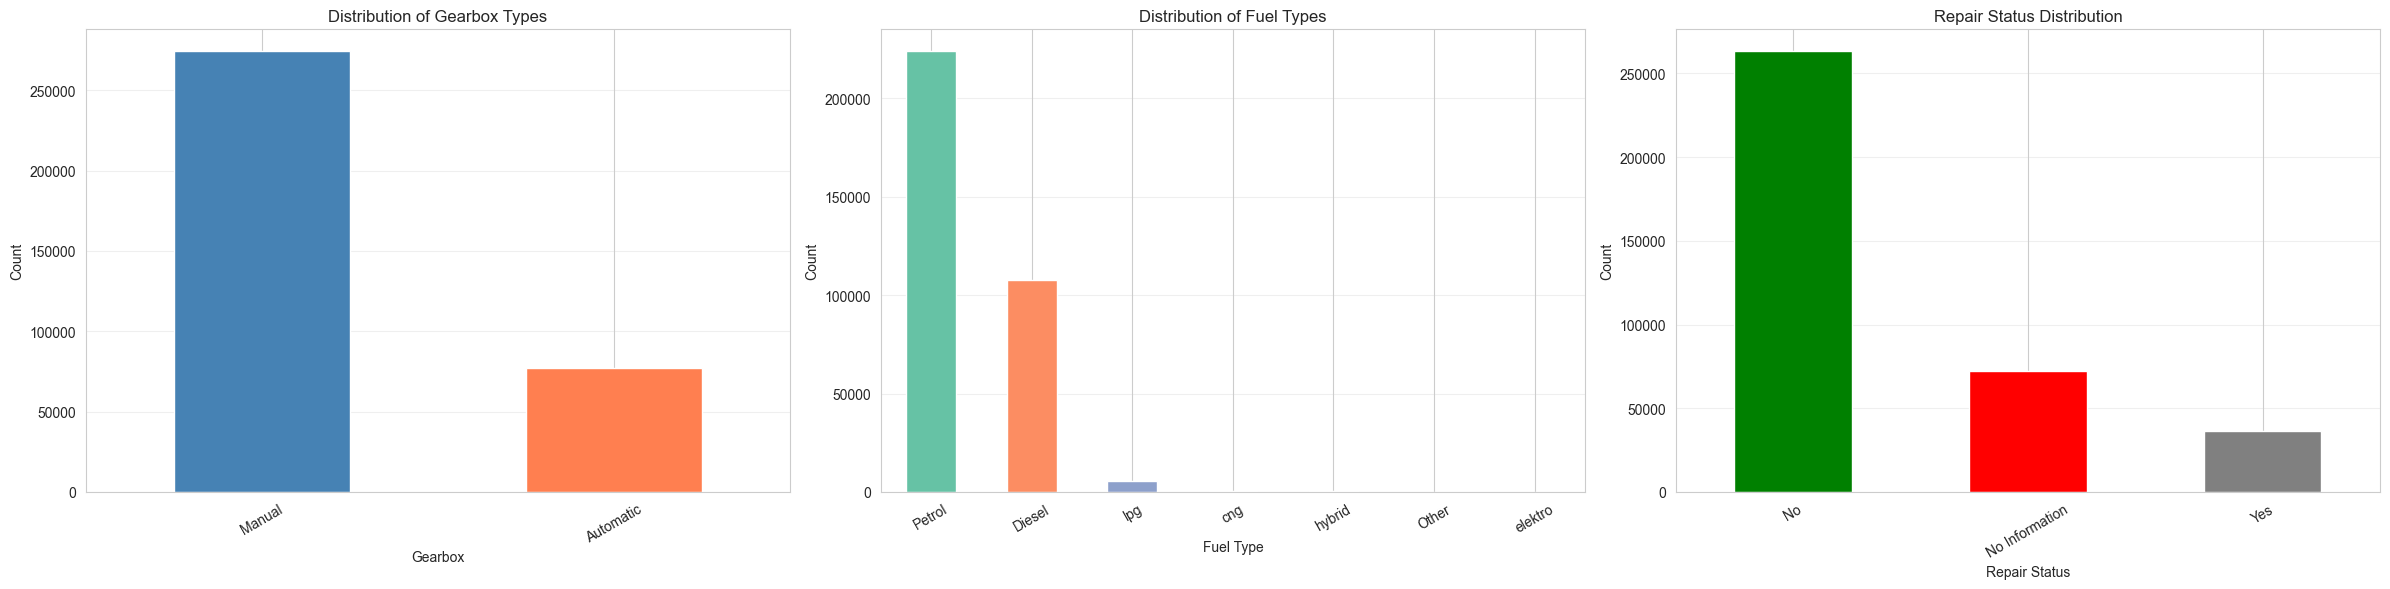

In [7]:
# =============================================================================
# VERIFY TRANSLATION RESULTS
# =============================================================================

# Visualize categorical distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Gearbox
df["gearbox"].value_counts().plot(
    kind="bar",
    ax=axes[0],
    color=["steelblue", "coral"],
    title="Distribution of Gearbox Types",
    xlabel="Gearbox",
    ylabel="Count",
    rot=30
)
axes[0].grid(axis='y', alpha=0.3)

# Fuel Type
df["fuelType"].value_counts().plot(
    kind="bar",
    ax=axes[1],
    color=sns.color_palette("Set2"),
    title="Distribution of Fuel Types",
    xlabel="Fuel Type",
    ylabel="Count",
    rot=30
)
axes[1].grid(axis='y', alpha=0.3)

# Not Repaired Damage
df["notRepairedDamage"].value_counts().plot(
    kind="bar",
    ax=axes[2],
    color=["green", "red", "gray"],
    title="Repair Status Distribution",
    xlabel="Repair Status",
    ylabel="Count",
    rot=30
)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
### Delete all records with fuelType as 'lpg', 'cng', 'hybrid', 'elektro', 'Other' because they make fuelType categorical variable imbalanced

invalid_fuel_types = ['lpg', 'cng', 'hybrid', 'elektro', 'Other']
df = df[~df['fuelType'].isin(invalid_fuel_types)].reset_index(drop=True)

---

## 2.3 Bước 3: Xử lý Outliers và Zero Values

Sử dụng phương pháp IQR để loại bỏ outliers cho các features số quan trọng.

---

🔍 Detecting and removing outliers using IQR method...

📊 Step 1: Visualizing distributions before outlier removal...


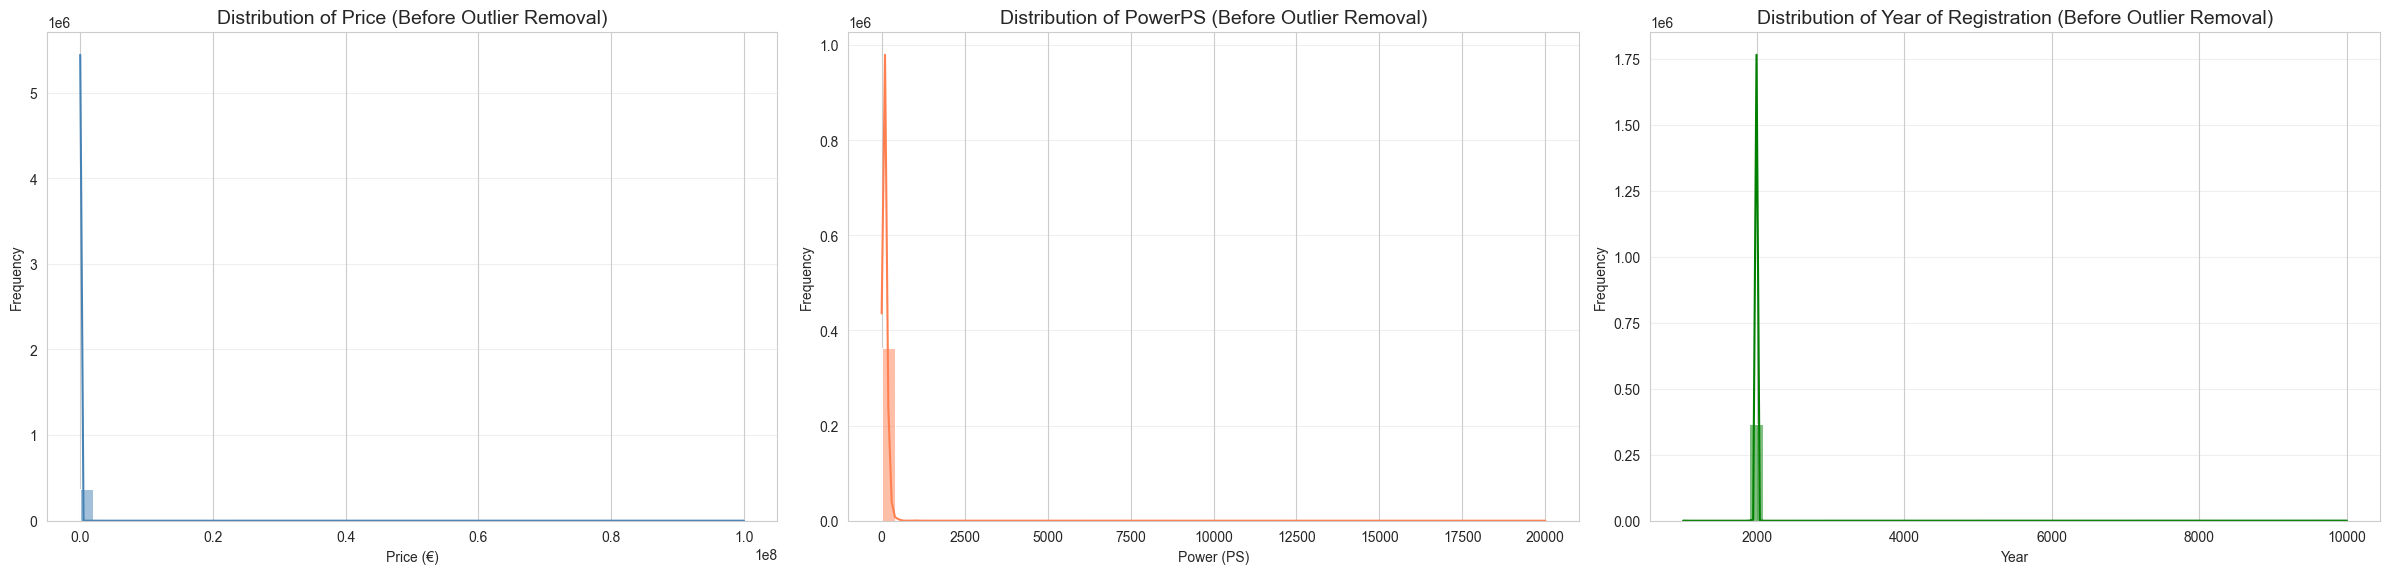


🛠️  Step 2: Defining IQR outlier removal function...

🧹 Step 3: Removing outliers...
   ✅ 'price': Removed 27,872 outliers (Bounds: -7927.50 - 16276.50)
   ✅ 'powerPS': Removed 6,176 outliers (Bounds: -40.00 - 248.00)
   ✅ 'yearOfRegistration': Removed 6,242 outliers (Bounds: 1987.00 - 2019.00)

📊 Total rows removed: 40,290
📊 Remaining rows: 324,695

📊 Step 4: Visualizing boxplots after outlier removal...


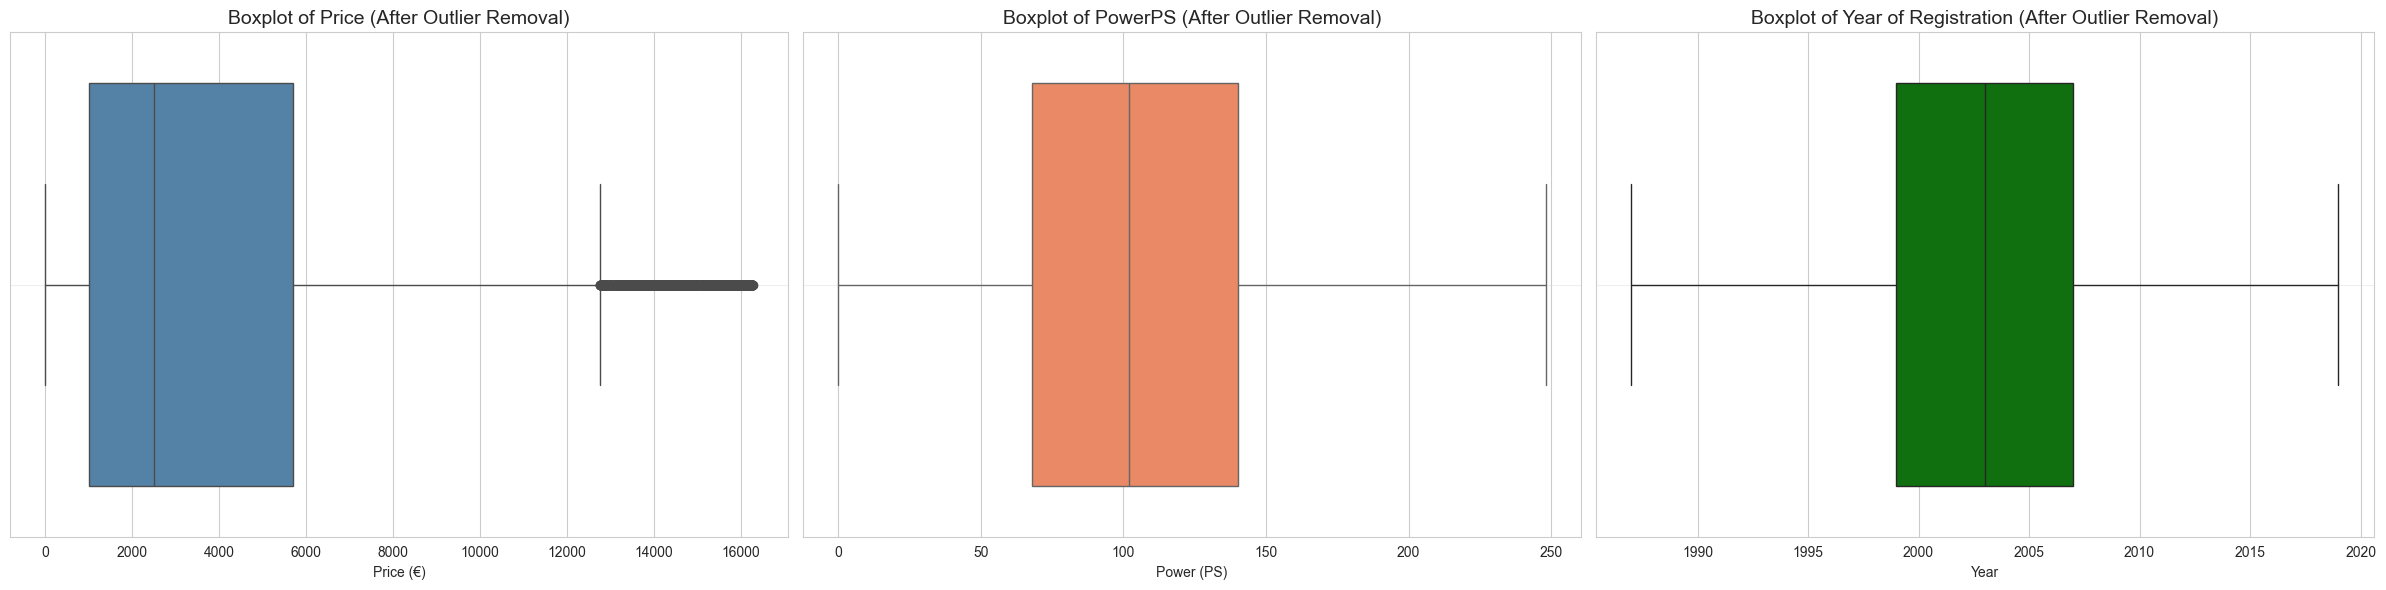


❌ Step 5: Removing zero and invalid values...
   ✅ Removed 48,236 rows with invalid values
   📊 Current shape: (276459, 17)

✅ Outlier removal completed!


In [9]:
# =============================================================================
# 2.3 OUTLIER DETECTION & REMOVAL
# =============================================================================

print("🔍 Detecting and removing outliers using IQR method...")
print("="*80)

# -------------------------
# Visualize distributions before outlier removal
# -------------------------
print("\n📊 Step 1: Visualizing distributions before outlier removal...")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Price distribution
sns.histplot(df["price"], bins=50, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Distribution of Price (Before Outlier Removal)", fontsize=14)
axes[0].set_xlabel("Price (€)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.3)

# PowerPS distribution
sns.histplot(df["powerPS"], bins=50, kde=True, ax=axes[1], color="coral")
axes[1].set_title("Distribution of PowerPS (Before Outlier Removal)", fontsize=14)
axes[1].set_xlabel("Power (PS)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', alpha=0.3)

# Year of Registration distribution
sns.histplot(df["yearOfRegistration"], bins=50, kde=True, ax=axes[2], color="green")
axes[2].set_title("Distribution of Year of Registration (Before Outlier Removal)", fontsize=14)
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Frequency")
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -------------------------
# IQR-based outlier removal function
# -------------------------
print("\n🛠️  Step 2: Defining IQR outlier removal function...")

def remove_outliers_iqr(data, column):
    """
    Loại bỏ outliers sử dụng phương pháp IQR (Interquartile Range)
    
    Parameters:
    -----------
    data : DataFrame
        Dữ liệu đầu vào
    column : str
        Tên cột cần xử lý outliers
        
    Returns:
    --------
    DataFrame : Dữ liệu sau khi loại bỏ outliers
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data within bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    removed_count = len(data) - len(filtered_data)
    print(f"   ✅ '{column}': Removed {removed_count:,} outliers (Bounds: {lower_bound:.2f} - {upper_bound:.2f})")
    
    return filtered_data

# -------------------------
# Apply IQR removal to numerical features
# -------------------------
print("\n🧹 Step 3: Removing outliers...")
rows_before = len(df)

df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "powerPS")
df = remove_outliers_iqr(df, "yearOfRegistration")
df.reset_index(drop=True, inplace=True)

rows_after = len(df)
print(f"\n📊 Total rows removed: {rows_before - rows_after:,}")
print(f"📊 Remaining rows: {rows_after:,}")

# -------------------------
# Visualize with boxplots after removal
# -------------------------
print("\n📊 Step 4: Visualizing boxplots after outlier removal...")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

sns.boxplot(x=df["price"], ax=axes[0], color="steelblue")
axes[0].set_title("Boxplot of Price (After Outlier Removal)", fontsize=14)
axes[0].set_xlabel("Price (€)")
axes[0].grid(axis='y', alpha=0.3)

sns.boxplot(x=df["powerPS"], ax=axes[1], color="coral")
axes[1].set_title("Boxplot of PowerPS (After Outlier Removal)", fontsize=14)
axes[1].set_xlabel("Power (PS)")
axes[1].grid(axis='y', alpha=0.3)

sns.boxplot(x=df["yearOfRegistration"], ax=axes[2], color="green")
axes[2].set_title("Boxplot of Year of Registration (After Outlier Removal)", fontsize=14)
axes[2].set_xlabel("Year")
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -------------------------
# Remove zero values from critical features
# -------------------------
print("\n❌ Step 5: Removing zero and invalid values...")
rows_before = len(df)

df = df[(df["price"] >= 200) & (df["powerPS"] >= 40) & (df["yearOfRegistration"] > 0)]
df.reset_index(drop=True, inplace=True)

rows_after = len(df)
print(f"   ✅ Removed {rows_before - rows_after:,} rows with invalid values")
print(f"   📊 Current shape: {df.shape}")

print("\n✅ Outlier removal completed!")
print("="*80)

--- 

## 2.4 Bước 4: Xử lý Missing Values và Feature Selection

---

🔍 Handling missing values and selecting features...

🗑️  Step 1: Dropping rows with missing values in critical categorical features...
   • 'vehicleType': 19,473 missing values
   • 'model': 10,297 missing values
   • 'fuelType': 17,991 missing values
   • 'gearbox': 5,386 missing values
   ✅ Dropped 38,500 rows with missing values

📊 Step 2: Analyzing correlation for feature selection...


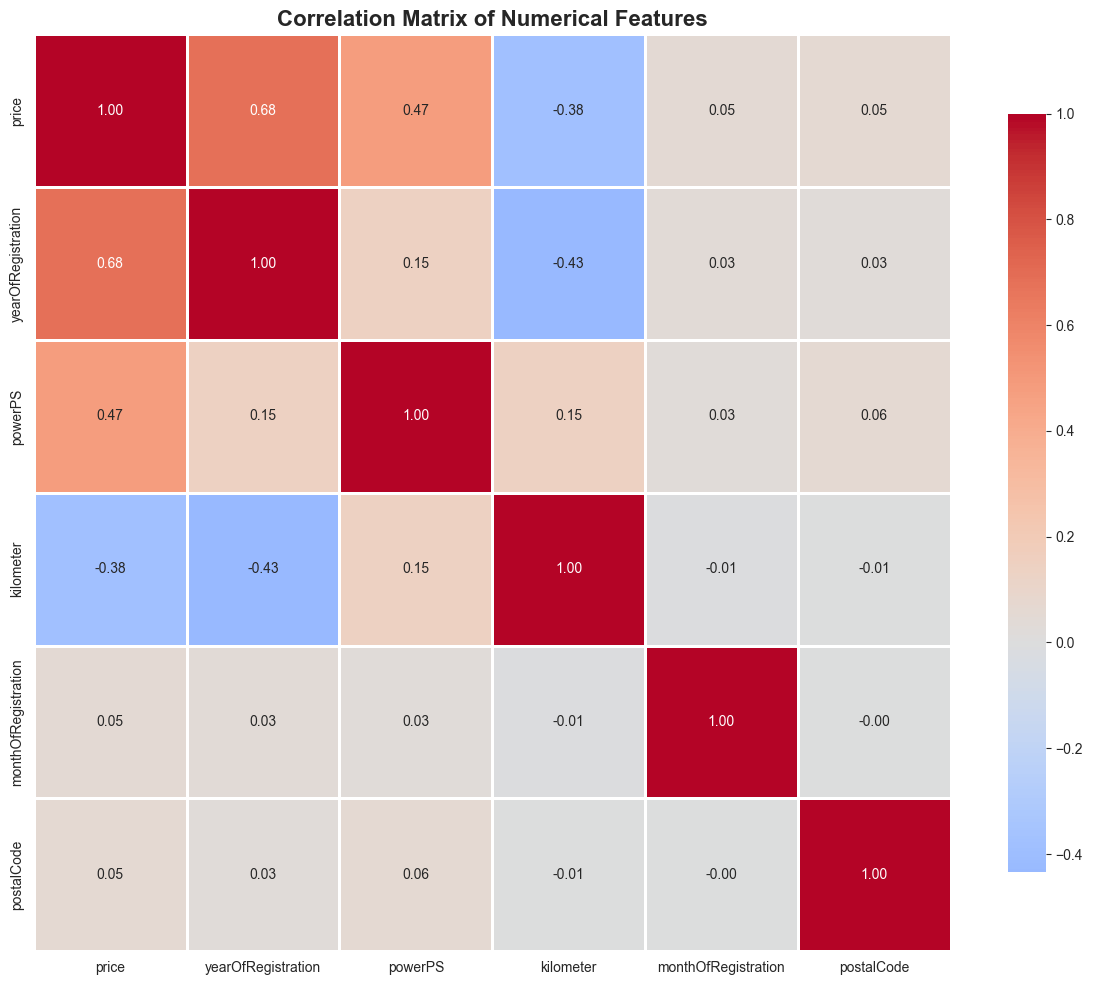


📈 Correlation with 'price':
   • yearOfRegistration: 0.6826
   • powerPS: 0.4740
   • postalCode: 0.0539
   • monthOfRegistration: 0.0484
   • kilometer: -0.3836

❌ Step 3: Dropping features with low relevance...
   ✅ Dropped 'postalCode'
   ✅ Dropped 'monthOfRegistration'
   ✅ Dropped 'dateCrawled'
   ✅ Dropped 'dateCreated'
   ✅ Dropped 'lastSeen'
   ✅ Dropped 'name'

🗑️  Step 4: Final duplicate removal after preprocessing...
   ✅ Removed 22,587 duplicate rows

📊 Final Dataset Summary:
   • Shape: 215,372 rows × 11 columns
   • Memory: 85.69 MB
   • Missing values: 0 cells

✅ Features remaining: ['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage']

✅ Missing value handling and feature selection completed!


In [10]:
# =============================================================================
# 2.4 MISSING VALUES & FEATURE SELECTION
# =============================================================================

print("🔍 Handling missing values and selecting features...")
print("="*80)

# -------------------------
# Drop rows with missing values in critical features
# -------------------------
print("\n🗑️  Step 1: Dropping rows with missing values in critical categorical features...")
critical_features = ["vehicleType", "model", "fuelType", "gearbox"]

for feature in critical_features:
    missing_count = df[feature].isna().sum()
    print(f"   • '{feature}': {missing_count:,} missing values")

rows_before = len(df)
df.dropna(subset=critical_features, inplace=True)
df.reset_index(drop=True, inplace=True)
rows_after = len(df)

print(f"   ✅ Dropped {rows_before - rows_after:,} rows with missing values")

# -------------------------
# Analyze correlation for feature selection
# -------------------------
print("\n📊 Step 2: Analyzing correlation for feature selection...")

# Create correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Display correlation with target (price)
print("\n📈 Correlation with 'price':")
price_corr = correlation_matrix['price'].sort_values(ascending=False)
for feature, corr_value in price_corr.items():
    if feature != 'price':
        print(f"   • {feature}: {corr_value:.4f}")

# -------------------------
# Drop features with low correlation or redundancy
# -------------------------
print("\n❌ Step 3: Dropping features with low relevance...")

features_to_drop = [
    "postalCode",           # Low correlation with price
    "monthOfRegistration",  # Already dropped or low correlation
    "dateCrawled",          # Temporal feature not needed for prediction
    "dateCreated",          # Temporal feature not needed for prediction
    "lastSeen",             # Temporal feature not needed for prediction
    "name"                  # High cardinality, low predictive power
]

for feature in features_to_drop:
    if feature in df.columns:
        df.drop(columns=feature, inplace=True)
        print(f"   ✅ Dropped '{feature}'")

# -------------------------
# Final duplicate removal
# -------------------------
print("\n🗑️  Step 4: Final duplicate removal after preprocessing...")
rows_before = len(df)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
rows_after = len(df)

print(f"   ✅ Removed {rows_before - rows_after:,} duplicate rows")

# -------------------------
# Final dataset summary
# -------------------------
print("\n📊 Final Dataset Summary:")
print(f"   • Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   • Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Missing values: {df.isna().sum().sum():,} cells")
print(f"\n✅ Features remaining: {list(df.columns)}")

print("\n✅ Missing value handling and feature selection completed!")
print("="*80)

--- 

## 2.5 Final Data Profiling Report
Tạo báo cáo cuối cùng sau khi preprocessing hoàn tất.

---

In [11]:
# =============================================================================
# 2.5 FINAL DATA PROFILING REPORT
# =============================================================================

print("📊 Generating final profiling report after preprocessing...")
print("⏳ This may take a few minutes...")

final_profile = ydata_profiling.ProfileReport(
    df, 
    title="German Used Car Dataset - After Preprocessing",
    explorative=True
)
final_profile.to_notebook_iframe()

📊 Generating final profiling report after preprocessing...
⏳ This may take a few minutes...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:06<00:00,  1.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# 📈 PHẦN 3: MODEL TRAINING & EVALUATION
## 3.1 Chuẩn bị Pipeline và Cross-Validation
Thiết lập pipeline preprocessing và cấu hình cross-validation.

---

In [12]:
# =============================================================================
# 3.1 PREPROCESSING PIPELINE SETUP
# =============================================================================

print("🛠️  Setting up ML pipeline...")
print("="*80)

# -------------------------
# Define feature groups
# -------------------------
print("\n📋 Step 1: Defining feature groups...")

# Numerical features (cần scaling)
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer']
print(f"   • Numerical features ({len(numerical_features)}): {numerical_features}")

# Low cardinality categorical features (dùng One-Hot Encoding)
categorical_low_card = ['vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage', 'abtest']
print(f"   • Low cardinality categorical ({len(categorical_low_card)}): {categorical_low_card}")

# High cardinality categorical features (dùng Target Encoding)
categorical_high_card = ['brand', 'model']
print(f"   • High cardinality categorical ({len(categorical_high_card)}): {categorical_high_card}")
print(f"      - 'brand': {df['brand'].nunique()} unique values")
print(f"      - 'model': {df['model'].nunique()} unique values")

# -------------------------
# Prepare X and y
# -------------------------
print("\n🎯 Step 2: Separating features and target...")
X = df.drop('price', axis=1)
y = df['price']

print(f"   ✅ X shape: {X.shape}")
print(f"   ✅ y shape: {y.shape}")

# -------------------------
# Build preprocessing pipeline
# -------------------------
print("\n🔧 Step 3: Building preprocessing pipeline...")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat_low', OneHotEncoder(drop='first', sparse_output=False), categorical_low_card),
        ('cat_high', TargetEncoder(), categorical_high_card)
    ],
    remainder='passthrough'
)

print("   ✅ Preprocessor created with:")
print("      - StandardScaler for numerical features")
print("      - OneHotEncoder for low cardinality categorical")
print("      - TargetEncoder for high cardinality categorical")

# -------------------------
# Define evaluation metrics
# -------------------------
print("\n📊 Step 4: Defining evaluation metrics...")

scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(root_mean_squared_error),
    'R2': make_scorer(r2_score)
}

print("   ✅ Metrics: MAE, RMSE, R²")

# -------------------------
# Configure K-Fold Cross-Validation
# -------------------------
print("\n🔀 Step 5: Configuring K-Fold Cross-Validation...")

N_SPLITS = 5
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

print(f"   ✅ K-Fold CV with {N_SPLITS} splits, shuffle=True, random_state=42")

print("\n✅ Pipeline setup completed!")
print("="*80)

🛠️  Setting up ML pipeline...

📋 Step 1: Defining feature groups...
   • Numerical features (3): ['yearOfRegistration', 'powerPS', 'kilometer']
   • Low cardinality categorical (5): ['vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage', 'abtest']
   • High cardinality categorical (2): ['brand', 'model']
      - 'brand': 39 unique values
      - 'model': 246 unique values

🎯 Step 2: Separating features and target...
   ✅ X shape: (215372, 10)
   ✅ y shape: (215372,)

🔧 Step 3: Building preprocessing pipeline...
   ✅ Preprocessor created with:
      - StandardScaler for numerical features
      - OneHotEncoder for low cardinality categorical
      - TargetEncoder for high cardinality categorical

📊 Step 4: Defining evaluation metrics...
   ✅ Metrics: MAE, RMSE, R²

🔀 Step 5: Configuring K-Fold Cross-Validation...
   ✅ K-Fold CV with 5 splits, shuffle=True, random_state=42

✅ Pipeline setup completed!


---

## 3.2 Huấn luyện và So sánh Các Mô hình
Sử dụng Cross-Validation để đánh giá 6 mô hình ML khác nhau.

---

In [21]:
# =============================================================================
# 3.2 MODEL TRAINING & CROSS-VALIDATION
# =============================================================================

print("🚀 Starting model training and cross-validation...")
print("="*80)

# -------------------------
# Define models to compare
# -------------------------
print("\n🤖 Models to be trained and evaluated:")

models = {
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_jobs=-1)
}

for i, (name, model) in enumerate(models.items(), 1):
    print(f"   {i}. {name}: {type(model).__name__}")

# -------------------------
# Cross-validation for each model
# -------------------------
print(f"\n🔄 Running {N_SPLITS}-Fold Cross-Validation for each model...")
print("="*80)

results = {}

for name, model in tqdm(models.items(), desc="Training Models"):
    print(f"\n🔹 Training: {name}")
    
    # Step 1: Create full pipeline (Preprocessor + Model)
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Step 2: Run cross-validation
    cv_results = cross_validate(
        full_pipeline, 
        X, y, 
        cv=kf, 
        scoring=scoring, 
        n_jobs=-1,  # Sử dụng tất cả CPU cores
        return_train_score=True
    )
    
    # Step 3: Aggregate results
    results[name] = {
        f'Test R² Mean (k={N_SPLITS})': np.mean(cv_results['test_R2']),
        f'Train R² Mean (k={N_SPLITS})': np.mean(cv_results['train_R2']),
        f'Test MAE Mean (k={N_SPLITS})': np.mean(cv_results['test_MAE']),
        f'Train MAE Mean (k={N_SPLITS})': np.mean(cv_results['train_MAE']),
        f'Test RMSE Mean (k={N_SPLITS})': np.mean(cv_results['test_RMSE']),
        f'Train RMSE Mean (k={N_SPLITS})': np.mean(cv_results['train_RMSE']),
        'Fit Time Mean': np.mean(cv_results['fit_time']),
        'Score Time Mean': np.mean(cv_results['score_time'])
    }
    
    print(f"   ✅ {name} - Test R²: {results[name][f'Test R² Mean (k={N_SPLITS})']:.4f}, "
          f"Test MAE: {results[name][f'Test MAE Mean (k={N_SPLITS})']:.2f}")

# -------------------------
# Create results DataFrame
# -------------------------
print("\n📊 Creating results summary...")
results_df = pd.DataFrame(results).T

print("\n" + "="*80)
print("🏆 CROSS-VALIDATION RESULTS COMPARISON (SORTED BY TEST R²)")
print("="*80)
display(results_df.sort_values(by=f'Test R² Mean (k={N_SPLITS})', ascending=False))

print("\n✅ Model comparison completed!")
print("="*80)

🚀 Starting model training and cross-validation...

🤖 Models to be trained and evaluated:
   1. XGBoost: XGBRegressor
   2. Random Forest: RandomForestRegressor
   3. Gradient Boosting: GradientBoostingRegressor
   4. Decision Tree: DecisionTreeRegressor
   5. Linear Regression: LinearRegression
   6. K-Nearest Neighbors: KNeighborsRegressor

🔄 Running 5-Fold Cross-Validation for each model...


Training Models:   0%|          | 0/6 [00:00<?, ?it/s]


🔹 Training: XGBoost


Training Models:  17%|█▋        | 1/6 [00:05<00:27,  5.47s/it]

   ✅ XGBoost - Test R²: 0.8859, Test MAE: 882.30

🔹 Training: Random Forest


Training Models:  33%|███▎      | 2/6 [00:41<01:34, 23.60s/it]

   ✅ Random Forest - Test R²: 0.8777, Test MAE: 903.50

🔹 Training: Gradient Boosting


Training Models:  50%|█████     | 3/6 [01:12<01:20, 26.97s/it]

   ✅ Gradient Boosting - Test R²: 0.8473, Test MAE: 1040.01

🔹 Training: Decision Tree


Training Models:  67%|██████▋   | 4/6 [01:16<00:35, 17.95s/it]

   ✅ Decision Tree - Test R²: 0.8265, Test MAE: 1039.61

🔹 Training: Linear Regression


Training Models:  83%|████████▎ | 5/6 [01:18<00:12, 12.05s/it]

   ✅ Linear Regression - Test R²: 0.7150, Test MAE: 1554.90

🔹 Training: K-Nearest Neighbors


Training Models: 100%|██████████| 6/6 [03:44<00:00, 37.40s/it]

   ✅ K-Nearest Neighbors - Test R²: 0.8530, Test MAE: 992.27

📊 Creating results summary...

🏆 CROSS-VALIDATION RESULTS COMPARISON (SORTED BY TEST R²)


Test R² Mean (k=5)  Train R² Mean (k=5)  \
XGBoost                        0.885864             0.897778   
Random Forest                  0.877728             0.954629   
K-Nearest Neighbors            0.853012             0.899290   
Gradient Boosting              0.847305             0.848628   
Decision Tree                  0.826453             0.963454   
Linear Regression              0.714980             0.715303   

                     Test MAE Mean (k=5)  Train MAE Mean (k=5)  \
XGBoost                       882.298633            848.516248   
Random Forest                 903.499740            528.866950   
K-Nearest Neighbors           992.265791            821.249497   
Gradient Boosting            1040.007337           1036.580330   
Decision Tree                1039.611988            373.804100   
Linear Regression            1554.898873           1554.162841   

                     Test RMSE Mean (k=5)  Train RMSE Mean (k=5)  \
XGBoost                       1321.445923            1250.597070   
Random Forest                 1367.736637             833.174739   
K-Nearest Neighbors           1499.608376            1241.316590   
Gradient Boosting             1528.452111            1521.839145   
Decision Tree                 1629.469469             747.756660   
Linear Regression             2088.233300            2087.074511   

                     Fit Time Mean  Score Time Mean  
XGBoost                   1.614048         0.110822  
Random Forest            25.939037         1.809087  
K-Nearest Neighbors       0.426533        25.767479  
Gradient Boosting        26.492184         0.115489  
Decision Tree             1.081779         0.090821  
Linear Regression         0.608880         0.105953


✅ Model comparison completed!


---

## 3.3 Visualization kết quả Cross-Validation

---

📊 Visualizing cross-validation results...

📉 Plotting MAE comparison...


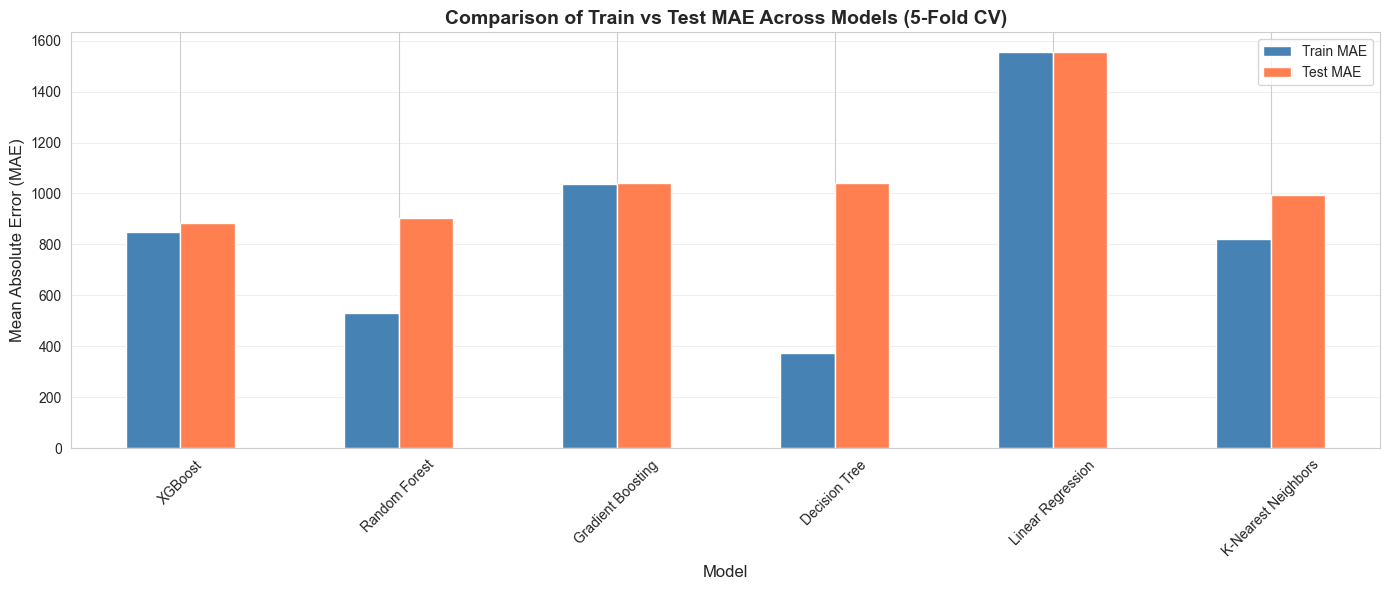


📉 Plotting RMSE comparison...


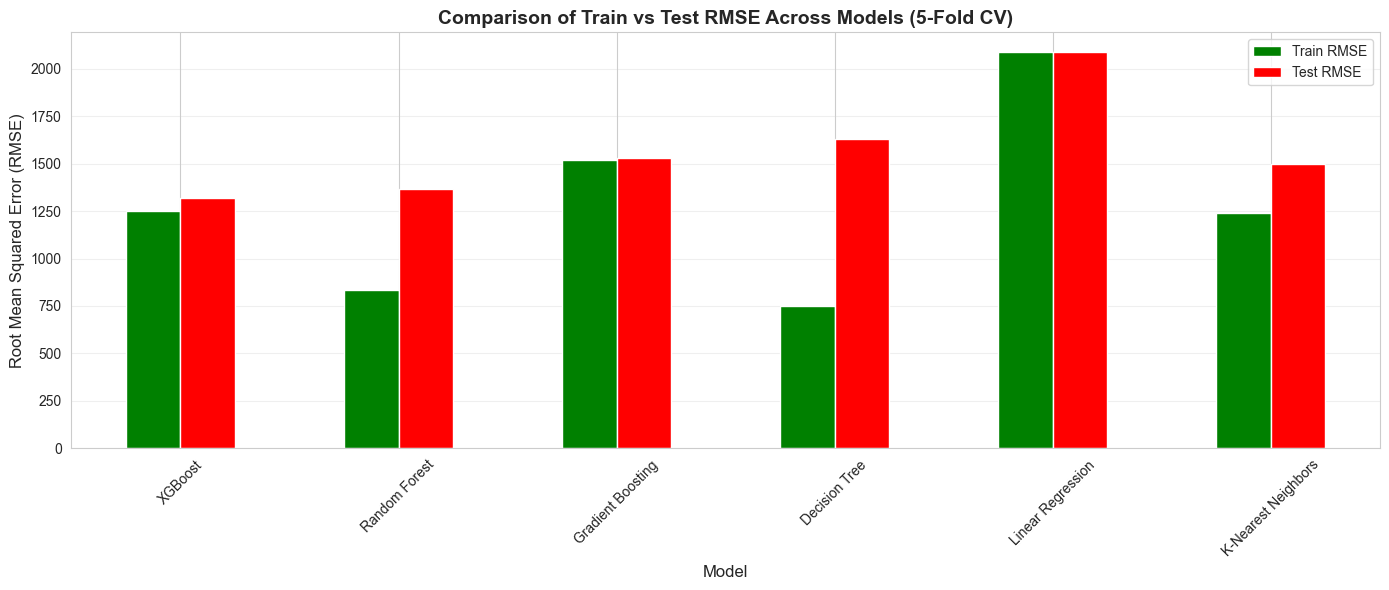


📈 Plotting R² comparison...


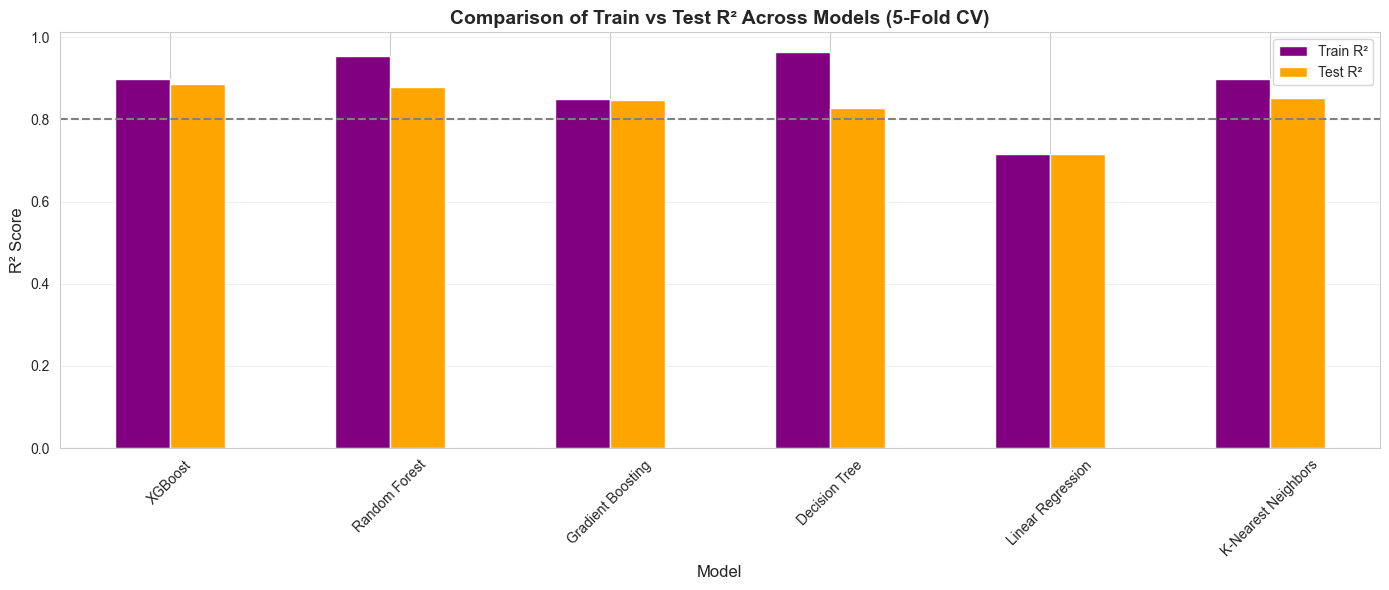


⏱️  Plotting training/scoring time comparison...


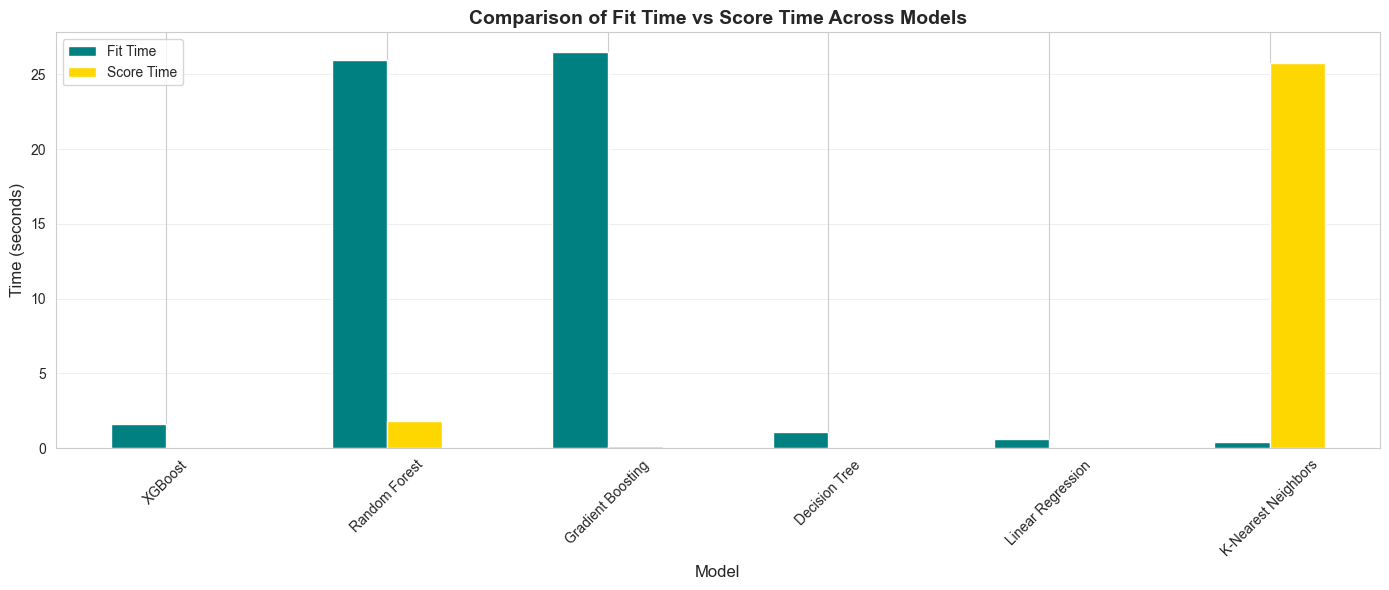


✅ Visualization completed!


In [22]:
# =============================================================================
# 3.3 VISUALIZATION OF CV RESULTS
# =============================================================================

print("📊 Visualizing cross-validation results...")
print("="*80)

# -------------------------
# MAE Comparison
# -------------------------
print("\n📉 Plotting MAE comparison...")
fig, ax = plt.subplots(figsize=(14, 6))
results_df[[f'Train MAE Mean (k={N_SPLITS})', f'Test MAE Mean (k={N_SPLITS})']].plot.bar(
    ax=ax,
    color=['steelblue', 'coral'],
    rot=45
)
ax.set_title(f"Comparison of Train vs Test MAE Across Models ({N_SPLITS}-Fold CV)", 
             fontsize=14, fontweight='bold')
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.legend(['Train MAE', 'Test MAE'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------
# RMSE Comparison
# -------------------------
print("\n📉 Plotting RMSE comparison...")
fig, ax = plt.subplots(figsize=(14, 6))
results_df[[f'Train RMSE Mean (k={N_SPLITS})', f'Test RMSE Mean (k={N_SPLITS})']].plot.bar(
    ax=ax,
    color=['green', 'red'],
    rot=45
)
ax.set_title(f"Comparison of Train vs Test RMSE Across Models ({N_SPLITS}-Fold CV)", 
             fontsize=14, fontweight='bold')
ax.set_ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.legend(['Train RMSE', 'Test RMSE'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------
# R² Comparison
# -------------------------
print("\n📈 Plotting R² comparison...")
fig, ax = plt.subplots(figsize=(14, 6))
results_df[[f'Train R² Mean (k={N_SPLITS})', f'Test R² Mean (k={N_SPLITS})']].plot.bar(
    ax=ax,
    color=['purple', 'orange'],
    rot=45
)
ax.set_title(f"Comparison of Train vs Test R² Across Models ({N_SPLITS}-Fold CV)", 
             fontsize=14, fontweight='bold')
ax.set_ylabel("R² Score", fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.legend(['Train R²', 'Test R²'])
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0.8, color='gray', linestyle='--', label='R²=0.8 Benchmark')
plt.tight_layout()
plt.show()

# -------------------------
# Time Comparison
# -------------------------
print("\n⏱️  Plotting training/scoring time comparison...")
fig, ax = plt.subplots(figsize=(14, 6))
results_df[['Fit Time Mean', 'Score Time Mean']].plot.bar(
    ax=ax,
    color=['teal', 'gold'],
    rot=45
)
ax.set_title(f"Comparison of Fit Time vs Score Time Across Models", 
             fontsize=14, fontweight='bold')
ax.set_ylabel("Time (seconds)", fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.legend(['Fit Time', 'Score Time'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Visualization completed!")
print("="*80)

---

# ⚙️ PHẦN 4: HYPERPARAMETER TUNING
## 4.1 Tuning cho K-Nearest Neighbors (GridSearchCV)

---

In [15]:
# =============================================================================
# 4.1 HYPERPARAMETER TUNING FOR KNN (GridSearchCV)
# =============================================================================

print("🔧 Starting hyperparameter tuning for K-Nearest Neighbors...")
print("="*80)

# -------------------------
# Setup KNN pipeline
# -------------------------
print("\n📦 Step 1: Setting up KNN pipeline...")
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_jobs=-1))
])

# -------------------------
# Define parameter grid
# -------------------------
print("\n🎯 Step 2: Defining parameter grid...")
param_grid = {
    'regressor__n_neighbors': [3, 5],          # Số lượng láng giềng
    'regressor__weights': ['uniform', 'distance'],    # Cách tính trọng số
    'regressor__p': [1, 2]                           # p=1: Manhattan, p=2: Euclidean
}

print("   Parameter grid:")
for param, values in param_grid.items():
    print(f"      • {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"\n   📊 Total combinations to test: {total_combinations}")

# -------------------------
# Run GridSearchCV
# -------------------------
print(f"\n🔄 Step 3: Running GridSearchCV with {N_SPLITS}-Fold CV...")
print("   (This may take several minutes...)")

grid_search = GridSearchCV(
    knn_pipeline, 
    param_grid, 
    cv=kf, 
    scoring='neg_mean_absolute_error',  # Tối ưu hóa MAE
    n_jobs=-1,
    return_train_score=False
)

grid_search.fit(X, y)

# -------------------------
# Display results
# -------------------------
print("\n🏆 GridSearchCV Results:")
print("="*80)
print(f"   ✅ Best parameters: {grid_search.best_params_}")
print(f"   ✅ Best MAE (CV): {-grid_search.best_score_:.2f}")
print(f"   ✅ Best estimator: {grid_search.best_estimator_}")

print("\n✅ KNN hyperparameter tuning completed!")
print("="*80)

🔧 Starting hyperparameter tuning for K-Nearest Neighbors...

📦 Step 1: Setting up KNN pipeline...

🎯 Step 2: Defining parameter grid...
   Parameter grid:
      • regressor__n_neighbors: [3, 5]
      • regressor__weights: ['uniform', 'distance']
      • regressor__p: [1, 2]

   📊 Total combinations to test: 8

🔄 Step 3: Running GridSearchCV with 5-Fold CV...
   (This may take several minutes...)

🏆 GridSearchCV Results:
   ✅ Best parameters: {'regressor__n_neighbors': 5, 'regressor__p': 1, 'regressor__weights': 'uniform'}
   ✅ Best MAE (CV): 981.33
   ✅ Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['yearOfRegistration',
                                                   'powerPS', 'kilometer']),
                                                 ('cat_low',
                                             

---

## 4.2 Tuning cho Random Forest (RandomizedSearchCV)

---

In [16]:
# =============================================================================
# 4.2 HYPERPARAMETER TUNING FOR RANDOM FOREST (RandomizedSearchCV)
# =============================================================================

print("🔧 Starting hyperparameter tuning for Random Forest...")
print("="*80)

# -------------------------
# Setup Random Forest pipeline
# -------------------------
print("\n📦 Step 1: Setting up Random Forest pipeline...")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# -------------------------
# Define parameter distribution
# -------------------------
print("\n🎯 Step 2: Defining parameter distribution...")
param_dist = {
    'regressor__n_estimators': [100, 200],          # Số lượng cây
    'regressor__max_depth': [10, 20],          # Độ sâu tối đa
    'regressor__min_samples_split': [2, 5],          # Số samples tối thiểu để split
    'regressor__min_samples_leaf': [1, 2],            # Số samples tối thiểu ở leaf
}

print("   Parameter distribution:")
for param, values in param_dist.items():
    print(f"      • {param}: {values}")

total_combinations = np.prod([len(v) for v in param_dist.values()])
print(f"\n   📊 Total possible combinations: {total_combinations}")

# -------------------------
# Run RandomizedSearchCV
# -------------------------
N_ITER = 5  # Số lần thử ngẫu nhiên
print(f"\n🔄 Step 3: Running RandomizedSearchCV with {N_ITER} iterations...")
print(f"   Using {N_SPLITS}-Fold CV and optimizing R²...")
print("   (This may take several minutes...)")

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=N_ITER,
    scoring='r2',  # Tối ưu hóa R²
    n_jobs=-1,
    random_state=42,
    return_train_score=False
)

random_search.fit(X, y)

# -------------------------
# Display results
# -------------------------
print("\n🏆 RandomizedSearchCV Results:")
print("="*80)
print(f"   ✅ Best parameters: {random_search.best_params_}")
print(f"   ✅ Best R² (CV): {random_search.best_score_:.4f}")
print(f"   ✅ Best estimator: {random_search.best_estimator_}")

print("\n✅ Random Forest hyperparameter tuning completed!")
print("="*80)

🔧 Starting hyperparameter tuning for Random Forest...

📦 Step 1: Setting up Random Forest pipeline...

🎯 Step 2: Defining parameter distribution...
   Parameter distribution:
      • regressor__n_estimators: [100, 200]
      • regressor__max_depth: [10, 20]
      • regressor__min_samples_split: [2, 5]
      • regressor__min_samples_leaf: [1, 2]

   📊 Total possible combinations: 16

🔄 Step 3: Running RandomizedSearchCV with 5 iterations...
   Using 5-Fold CV and optimizing R²...
   (This may take several minutes...)

🏆 RandomizedSearchCV Results:
   ✅ Best parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': 20}
   ✅ Best R² (CV): 0.8844
   ✅ Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['yearOfRegistration',
       

---

# 🎯 PHẦN 5: FINAL MODEL TESTING
## 5.1 Train/Test Split và Đánh giá Mô hình Cuối cùng

---

In [17]:
# =============================================================================
# 5.1 TRAIN-TEST SPLIT
# =============================================================================

print("🔀 Creating train-test split...")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% train, 20% test
    random_state=42
)

print(f"\n📊 Dataset split:")
print(f"   • Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n🔍 First 5 rows of X_train:")
display(X_train.head())

print("\n✅ Train-test split completed!")
print("="*80)

🔀 Creating train-test split...

📊 Dataset split:
   • Training set: 172,297 samples (80.0%)
   • Test set: 43,075 samples (20.0%)

🔍 First 5 rows of X_train:


abtest    vehicleType  yearOfRegistration gearbox  powerPS     model  \
176913   test  Station Wagon                1992  Manual       93  e_klasse   
10576    test          Coupe                2000  Manual      163       clk   
100363   test      Limousine                1993  Manual       75      golf   
200839   test      Limousine                2005  Manual      122       1er   
78104    test  Station Wagon                2005  Manual      116        c5   

        kilometer fuelType          brand notRepairedDamage  
176913     150000   Diesel  Mercedes-Benz                No  
10576      150000   Petrol  Mercedes-Benz               Yes  
100363      90000   Petrol     Volkswagen                No  
200839     150000   Diesel            BMW                No  
78104      100000   Petrol        Citroen                No


✅ Train-test split completed!


---

## 5.2 Đánh giá KNN với Best Parameters

---

In [18]:
# =============================================================================
# 5.2 FINAL KNN EVALUATION
# =============================================================================

print("🤖 Training and evaluating KNN with best parameters...")
print("="*80)

# -------------------------
# Create best KNN model
# -------------------------
print("\n🔧 Step 1: Creating KNN with best parameters...")
best_knn = KNeighborsRegressor(
    n_neighbors=5,     
    weights='uniform', 
    p=1,           
    n_jobs=-1
)

print(f"   ✅ Best KNN configuration: n_neighbors=5, weights='uniform', p=1")
# -------------------------
# Create and train pipeline
# -------------------------
print("\n🚀 Step 2: Training KNN pipeline...")
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_knn)
])

knn_pipeline.fit(X_train, y_train)
print("   ✅ Training completed!")

# -------------------------
# Make predictions
# -------------------------
print("\n🔮 Step 3: Making predictions on test set...")
y_pred_knn = knn_pipeline.predict(X_test)

# -------------------------
# Evaluate performance
# -------------------------
print("\n📊 Step 4: Evaluating performance...")

knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_rmse = root_mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print("\n🏆 KNN Regressor Performance on Test Set:")
print("="*80)
print(f"   • MAE:  {knn_mae:.2f} €")
print(f"   • RMSE: {knn_rmse:.2f} €")
print(f"   • R²:   {knn_r2:.4f}")
print("="*80)

# -------------------------
# Show sample predictions
# -------------------------
print("\n🔍 Sample Predictions vs Actual Values:")
print(f"{'Predicted (€)':<20} {'Actual (€)':<20} {'Difference (€)':<20}")
print("-" * 60)

for i in range(10):
    pred = y_pred_knn[i]
    actual = y_test.iloc[i]
    diff = pred - actual
    print(f"{pred:<20.2f} {actual:<20.2f} {diff:+20.2f}")

print("\n✅ KNN evaluation completed!")
print("="*80)

🤖 Training and evaluating KNN with best parameters...

🔧 Step 1: Creating KNN with best parameters...
   ✅ Best KNN configuration: n_neighbors=5, weights='uniform', p=1

🚀 Step 2: Training KNN pipeline...
   ✅ Training completed!

🔮 Step 3: Making predictions on test set...

📊 Step 4: Evaluating performance...

🏆 KNN Regressor Performance on Test Set:
   • MAE:  987.79 €
   • RMSE: 1490.85 €
   • R²:   0.8535

🔍 Sample Predictions vs Actual Values:
Predicted (€)        Actual (€)           Difference (€)      
------------------------------------------------------------
15167.80             14750.00                          +417.80
669.80               250.00                            +419.80
1039.40              1099.00                            -59.60
4779.80              4299.00                           +480.80
9790.00              8700.00                          +1090.00
919.80               600.00                            +319.80
3287.00              3500.00                 

---

## 5.3 Đánh giá Random Forest với Best Parameters

---

In [19]:
# =============================================================================
# 5.3 FINAL RANDOM FOREST EVALUATION
# =============================================================================

print("🌲 Training and evaluating Random Forest with best parameters...")
print("="*80)

# -------------------------
# Create best Random Forest model
# -------------------------
print("\n🔧 Step 1: Creating Random Forest with best parameters...")
best_rf = RandomForestRegressor(
    n_estimators=100,        # Best từ RandomizedSearchCV
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1
)

print(f"   ✅ Best RF configuration:")
print(f"      • n_estimators: 100")
print(f"      • max_depth: 20")
print(f"      • min_samples_split: 5")
print(f"      • min_samples_leaf: 2")

# -------------------------
# Create and train pipeline
# -------------------------
print("\n🚀 Step 2: Training Random Forest pipeline...")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_rf)
])

rf_pipeline.fit(X_train, y_train)
print("   ✅ Training completed!")

# -------------------------
# Make predictions
# -------------------------
print("\n🔮 Step 3: Making predictions on test set...")
y_pred_rf = rf_pipeline.predict(X_test)

# -------------------------
# Evaluate performance
# -------------------------
print("\n📊 Step 4: Evaluating performance...")

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = root_mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\n🏆 Random Forest Performance on Test Set:")
print("="*80)
print(f"   • MAE:  {rf_mae:.2f} €")
print(f"   • RMSE: {rf_rmse:.2f} €")
print(f"   • R²:   {rf_r2:.4f}")
print("="*80)

# -------------------------
# Show sample predictions
# -------------------------
print("\n🔍 Sample Predictions vs Actual Values:")
print(f"{'Predicted (€)':<20} {'Actual (€)':<20} {'Difference (€)':<20}")
print("-" * 60)

for i in range(10):
    pred = y_pred_rf[i]
    actual = y_test.iloc[i]
    diff = pred - actual
    print(f"{pred:<20.2f} {actual:<20.2f} {diff:+20.2f}")

print("\n✅ Random Forest evaluation completed!")
print("="*80)

🌲 Training and evaluating Random Forest with best parameters...

🔧 Step 1: Creating Random Forest with best parameters...
   ✅ Best RF configuration:
      • n_estimators: 100
      • max_depth: 20
      • min_samples_split: 5
      • min_samples_leaf: 2

🚀 Step 2: Training Random Forest pipeline...
   ✅ Training completed!

🔮 Step 3: Making predictions on test set...

📊 Step 4: Evaluating performance...

🏆 Random Forest Performance on Test Set:
   • MAE:  882.34 €
   • RMSE: 1331.63 €
   • R²:   0.8832

🔍 Sample Predictions vs Actual Values:
Predicted (€)        Actual (€)           Difference (€)      
------------------------------------------------------------
13002.75             14750.00                         -1747.25
705.42               250.00                            +455.42
877.83               1099.00                           -221.17
4592.36              4299.00                           +293.36
9978.71              8700.00                          +1278.71
1122.43     

---

## 5.4 So sánh Kết quả Cuối cùng

---

📊 Comparing final model performances...

🏆 FINAL MODEL COMPARISON ON TEST SET:


MAE (€)     RMSE (€)        R²
Model                                           
KNN            987.790658  1490.849445  0.853549
Random Forest  882.343822  1331.626202  0.883160

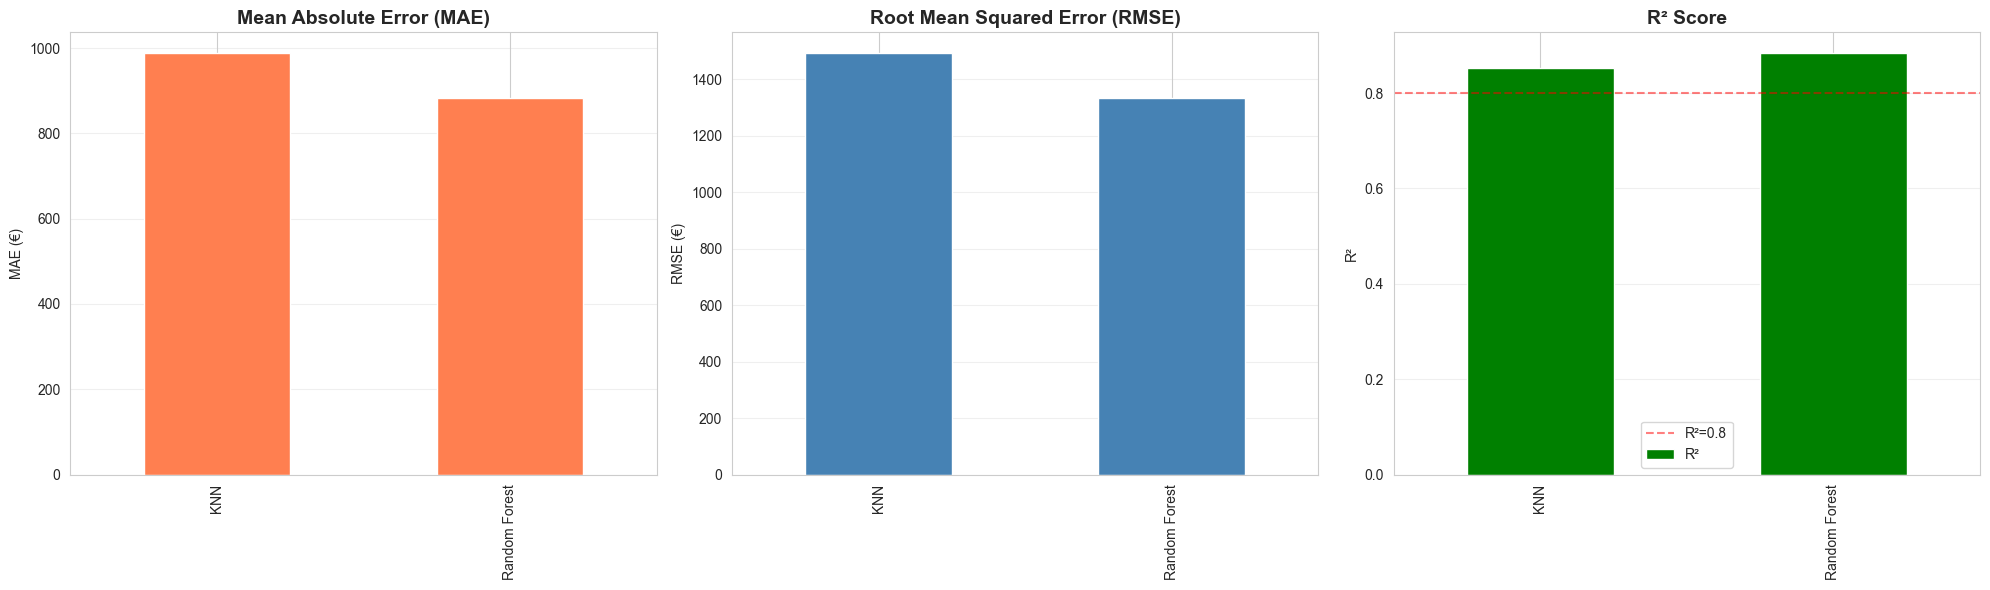


✅ Final comparison completed!


In [20]:
# =============================================================================
# 5.4 FINAL MODEL COMPARISON
# =============================================================================

print("📊 Comparing final model performances...")
print("="*80)

# Create comparison DataFrame
final_comparison = pd.DataFrame({
    'Model': ['KNN', 'Random Forest'],
    'MAE (€)': [knn_mae, rf_mae],
    'RMSE (€)': [knn_rmse, rf_rmse],
    'R²': [knn_r2, rf_r2]
})

print("\n🏆 FINAL MODEL COMPARISON ON TEST SET:")
print("="*80)
display(final_comparison.set_index('Model'))

# Visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# MAE Comparison
final_comparison.plot.bar(
    x='Model', y='MAE (€)', ax=axes[0], color='coral', legend=False
)
axes[0].set_title("Mean Absolute Error (MAE)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("MAE (€)")
axes[0].set_xlabel("")
axes[0].grid(axis='y', alpha=0.3)

# RMSE Comparison
final_comparison.plot.bar(
    x='Model', y='RMSE (€)', ax=axes[1], color='steelblue', legend=False
)
axes[1].set_title("Root Mean Squared Error (RMSE)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("RMSE (€)")
axes[1].set_xlabel("")
axes[1].grid(axis='y', alpha=0.3)

# R² Comparison
final_comparison.plot.bar(
    x='Model', y='R²', ax=axes[2], color='green', legend=False
)
axes[2].set_title("R² Score", fontsize=14, fontweight='bold')
axes[2].set_ylabel("R²")
axes[2].set_xlabel("")
axes[2].axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='R²=0.8')
axes[2].grid(axis='y', alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n✅ Final comparison completed!")
print("="*80)

# 🎓 KẾT LUẬN VÀ NHẬN XÉT

## ✅ Tổng kết công việc đã thực hiện:

### 1. **Exploratory Data Analysis (EDA)**
- Phân tích 371,528 records với 20 features ban đầu
- Phát hiện missing values (2.5%), duplicates, zero values
- Sử dụng ydata_profiling để tạo báo cáo tổng quan chi tiết

### 2. **Data Preprocessing**
- ✅ Chuyển đổi datetime columns
- ✅ Dịch thuật ngữ tiếng Đức sang tiếng Anh
- ✅ Xử lý outliers bằng phương pháp IQR
- ✅ Loại bỏ zero values và invalid data
- ✅ Xử lý missing values
- ✅ Feature selection dựa trên correlation analysis

### 3. **Feature Engineering**
- StandardScaler cho numerical features
- OneHotEncoder cho low cardinality categorical
- TargetEncoder cho high cardinality (brand, model)

### 4. **Model Training & Evaluation**
- So sánh 6 mô hình: XGBoost, Random Forest, Gradient Boosting, Decision Tree, Linear Regression, KNN
- Sử dụng 5-Fold Cross-Validation
- Metrics: MAE, RMSE, R²

### 5. **Hyperparameter Tuning**
- GridSearchCV cho KNN
- RandomizedSearchCV cho Random Forest

### 6. **Final Testing**
- Test trên holdout set (20% data)
- So sánh performance của KNN và Random Forest

## 🏆 Kết quả đạt được:

- Trong 2 mô hình **K-Nearest Neighbors (KNN)** và **Random Forest**, **Random Forest** cho kết quả tốt nhất với R² > 0.8
- MAE và RMSE thấp, cho thấy mô hình dự đoán chính xác
- Pipeline đảm bảo không có data leakage
